# <center>${\textbf{Flat Earthers}}$<br></center>


${\textbf{Hypothesis }}$: Is the Earth, the planet we live on, perfectly round? When we look at
pictures of the Earth, one could believe that its shape is totally spherical, like a kind of
bowling ball. However, the blue planet is not perfectly round, that does not mean that it is flat, contrary to what
flat, contrary to what the "platists" say.


* "In 1671, Picard argues that the Earth is not perfectly
spherical. Around 1675, Hooke (1635-1703) asserted that due to their
their rotational motion, all the planets are ellipsoids
flattened. Abbot Picard (1620-1682)
* "the Earth was declared spherical in the Greek world in the
Pythagorean milieu of the 5th or 6th century BC".
Régis Morelon

${\textbf{Conspiracy theories }}$
- Explanation: the earth would be an immobile disk, bordered by a wall of ice and having the north pole in its center.
pole in its center. The sun and the moon would be in orbit around the Earth at about 4000
km from the latter. Among them, some also assert that we have never been to the moon, and that
never been on the moon, and that the conquest of space is a lie, orchestrated with the help of
with the help of Hollywood and special effects.
- Initiation of theories and Provence of information: The source of this theory is quite
hard to find in view of the great number of Internet sites and books dealing with the
question. Nevertheless, since 1956, there is an organization supporting the idea that the Earth is flat
is flat, the "Flat Earth Society". It is this society that brings together people who adhere to
conspiracy theory and wishing to prove that it is true, with the aim of making a maximum of
a maximum of other people to join. In 2012, it had 421 members.
- The flat earth and non-existence of space conquest theories are based on the fact that "we are being lied to
that we are lied to", "that the truth is hidden from us" or "that we are manipulated". Indeed, if at first sight there is no interest
to be lied to on these subjects, the conspiracy theorists believe that this lie is the proof that we can be lied to
on other subjects, often more serious.

${\textbf{Librairies}}$

In [32]:
import os
from IPython.display import display, HTML
css_str = '<style> \
.jp-Button path { fill: #616161;} \
text.terms { fill: #616161;} \
.jp-icon-warn0 path {fill: var(--jp-warn-color0);} \
.bp3-button-text path { fill: var(--jp-inverse-layout-color3);} \
.jp-icon-brand0 path { fill: var(--jp-brand-color0);} \
text.terms { fill: #616161;} \
</style>'
display(HTML(css_str ))

C:\Users\Youssef Tfifhq\AppData\Local\Temp\ipykernel_3488\3155515444.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
import snscrape.modules.twitter as sntwitter

In [4]:
import time
import numpy as np
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from textblob import TextBlob
from wordcloud import WordCloud
import re

In [6]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt');

[nltk_data] Downloading package wordnet to C:\Users\Youssef
[nltk_data]     Tfifhq\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Youssef
[nltk_data]     Tfifhq\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Youssef
[nltk_data]     Tfifhq\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from pprint import pprint

In [8]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
pyLDAvis.enable_notebook()


 ${\textbf{Streaming Tweets into Database}}$

In [9]:
# Creating list to append tweet data to
attributes_container = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper(' flat earth covid since:2022-01-01 until:2022-10-10').get_items()):
    if i>1500:
        break
    attributes_container.append([tweet.user.username, tweet.date, tweet.likeCount, tweet.content])
    
# Creating a dataframe to load the list
FlatEarthTweets = pd.DataFrame(attributes_container, columns=["User", "Date Created", "Number of Likes","Tweet"])

In [10]:
FlatEarthTweets.head()

,User,Date Created,Number of Likes,Tweet
0,Doobyis,2022-10-07 14:42:10+00:00,1,If I'm being honest I've went my whole life fe...
1,jeetinhere,2022-10-07 12:25:02+00:00,0,#illuminati #newworldorder #nwo #wakeup #agend...
2,FLATEARTHCENTER,2022-10-07 05:12:52+00:00,0,Covid vaccine warning to children as Dr Nick C...
3,injured420,2022-10-07 03:38:34+00:00,0,@gayletheartist I sure wasn't going for the fu...
4,ravenladie,2022-10-07 02:36:02+00:00,0,@BisonPartySK I agree! I knew he'd fallen down...


In [11]:
print(FlatEarthTweets.shape)
FlatEarthTweets.info()

(1501, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   User             1501 non-null   object             
 1   Date Created     1501 non-null   datetime64[ns, UTC]
 2   Number of Likes  1501 non-null   int64              
 3   Tweet            1501 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(1), object(2)
memory usage: 47.0+ KB



 ${\textbf{Cleaning the tweets and Lemmatizing}}$

In [12]:
def preprocess(tweet):
    # remove links
    tweet = re.sub(r'http\S+', '', tweet)
    # remove mentions
    tweet = re.sub("@\w+","",tweet)
    # alphanumeric and hashtags
    tweet = re.sub("[^a-zA-Z#]"," ",tweet)
    # remove multiple spaces
    tweet = re.sub("\s+"," ",tweet)
    tweet = tweet.lower()
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    sent = ' '.join([lemmatizer.lemmatize(w) for w in tweet.split() if len(lemmatizer.lemmatize(w))>3])
    # #the stemmer requires a language parameter
    # snow_stemmer = SnowballStemmer(language='english')
    # for w in sent:
    #     sent = snow_stemmer.stem(w)
    return sent

<>:5: DeprecationWarning: invalid escape sequence \w
<>:9: DeprecationWarning: invalid escape sequence \s
<>:5: DeprecationWarning: invalid escape sequence \w
<>:9: DeprecationWarning: invalid escape sequence \s
C:\Users\Youssef Tfifhq\AppData\Local\Temp\ipykernel_3488\2789119923.py:5: DeprecationWarning: invalid escape sequence \w
  tweet = re.sub("@\w+","",tweet)
C:\Users\Youssef Tfifhq\AppData\Local\Temp\ipykernel_3488\2789119923.py:9: DeprecationWarning: invalid escape sequence \s
  tweet = re.sub("\s+"," ",tweet)


In [13]:
FlatEarthTweets.iloc[0,3]

"If I'm being honest I've went my whole life feeling out of place for liking Hip Hop in Alberta.. then even when I do meet other Hip Hop people they're like Monster hat wearing, battle rap obsessed, flat earth, covid deniers and I feel like even more of an oddity."

In [14]:
for i in range(0,len(FlatEarthTweets)):
    FlatEarthTweets.iloc[i,3] = preprocess(FlatEarthTweets.iloc[i,3])
FlatEarthTweets.head()

,User,Date Created,Number of Likes,Tweet
0,Doobyis,2022-10-07 14:42:10+00:00,1,being honest went whole life feeling place lik...
1,jeetinhere,2022-10-07 12:25:02+00:00,0,#illuminati #newworldorder #nwo #wakeup #agend...
2,FLATEARTHCENTER,2022-10-07 05:12:52+00:00,0,covid vaccine warning child nick coatsworth de...
3,injured420,2022-10-07 03:38:34+00:00,0,sure wasn going full natural dose covid proble...
4,ravenladie,2022-10-07 02:36:02+00:00,0,agree knew fallen down rabbit hole covid vacci...


In [15]:
pp.ProfileReport(FlatEarthTweets)

C:\Users\anaconda3\lib\site-packages\pandas_profiling\profile_report.py:409: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display
C:\Users\anaconda3\lib\site-packages\pandas_profiling\report\presentation\flavours\widget\duplicate.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display
C:\Users\anaconda3\lib\site-packages\pandas_profiling\report\presentation\flavours\widget\sample.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

${\textbf{Tokenizing text data using NLTK}}$

In [16]:
def tokenize(column):
    """Tokenizes a Pandas dataframe column and returns a list of tokens.

    Args:
        column: Pandas dataframe column (i.e. df['text']).

    Returns:
        tokens (list): Tokenized list, i.e. [Donald, Trump, tweets]
    """

    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha()] 

In [17]:
FlatEarthTweets['Tokenized'] = FlatEarthTweets.apply(lambda x: tokenize(x['Tweet']), axis=1)
FlatEarthTweets

,User,Date Created,Number of Likes,Tweet,Tokenized
0,Doobyis,2022-10-07 14:42:10+00:00,1,being honest went whole life feeling place lik...,"[being, honest, went, whole, life, feeling, pl..."
1,jeetinhere,2022-10-07 12:25:02+00:00,0,#illuminati #newworldorder #nwo #wakeup #agend...,"[illuminati, newworldorder, nwo, wakeup, agend..."
2,FLATEARTHCENTER,2022-10-07 05:12:52+00:00,0,covid vaccine warning child nick coatsworth de...,"[covid, vaccine, warning, child, nick, coatswo..."
3,injured420,2022-10-07 03:38:34+00:00,0,sure wasn going full natural dose covid proble...,"[sure, wasn, going, full, natural, dose, covid..."
4,ravenladie,2022-10-07 02:36:02+00:00,0,agree knew fallen down rabbit hole covid vacci...,"[agree, knew, fallen, down, rabbit, hole, covi..."
...,...,...,...,...,...
1496,sadboizFM,2022-01-17 12:09:36+00:00,0,rather official government crime statistic tha...,"[rather, official, government, crime, statisti..."
1497,Truth8eeker,2022-01-17 10:19:47+00:00,1,they already have denied flat earth believe wh...,"[they, already, have, denied, flat, earth, bel..."
1498,TanzKraft,2022-01-17 09:26:14+00:00,11,skillnad antivaxx skeptiskt till experiment mn...,"[skillnad, antivaxx, skeptiskt, till, experime..."
1499,chucky86,2022-01-17 02:34:12+00:00,0,covid alien pyramid flatearth,"[covid, alien, pyramid, flatearth]"


In [18]:
FlatEarthTweets['Token_Count'] = FlatEarthTweets['Tokenized'].str.len()
FlatEarthTweets

,User,Date Created,Number of Likes,Tweet,Tokenized,Token_Count
0,Doobyis,2022-10-07 14:42:10+00:00,1,being honest went whole life feeling place lik...,"[being, honest, went, whole, life, feeling, pl...",30
1,jeetinhere,2022-10-07 12:25:02+00:00,0,#illuminati #newworldorder #nwo #wakeup #agend...,"[illuminati, newworldorder, nwo, wakeup, agend...",16
2,FLATEARTHCENTER,2022-10-07 05:12:52+00:00,0,covid vaccine warning child nick coatsworth de...,"[covid, vaccine, warning, child, nick, coatswo...",15
3,injured420,2022-10-07 03:38:34+00:00,0,sure wasn going full natural dose covid proble...,"[sure, wasn, going, full, natural, dose, covid...",24
4,ravenladie,2022-10-07 02:36:02+00:00,0,agree knew fallen down rabbit hole covid vacci...,"[agree, knew, fallen, down, rabbit, hole, covi...",31
...,...,...,...,...,...,...
1496,sadboizFM,2022-01-17 12:09:36+00:00,0,rather official government crime statistic tha...,"[rather, official, government, crime, statisti...",17
1497,Truth8eeker,2022-01-17 10:19:47+00:00,1,they already have denied flat earth believe wh...,"[they, already, have, denied, flat, earth, bel...",30
1498,TanzKraft,2022-01-17 09:26:14+00:00,11,skillnad antivaxx skeptiskt till experiment mn...,"[skillnad, antivaxx, skeptiskt, till, experime...",21
1499,chucky86,2022-01-17 02:34:12+00:00,0,covid alien pyramid flatearth,"[covid, alien, pyramid, flatearth]",4


${\textbf{Removing english StopWords text data using NLTK}}$

In [19]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [20]:
def remove_english_stopwords_func(text):
    '''
    Removes Stop Words (also capitalized) from a string, if present
    
    Args:
        text (str): String to which the function is to be applied, string
    
    Returns:
        Clean string without Stop Words
    ''' 
    # check in lowercase 
    t = [token for token in text if token.lower() not in stopwords.words("english")]
    text = ' '.join(t)    
    return text

In [21]:
FlatEarthTweets['Tokenized_NoStopWords'] = FlatEarthTweets['Tokenized'].apply(remove_english_stopwords_func)

FlatEarthTweets.head()

,User,Date Created,Number of Likes,Tweet,Tokenized,Token_Count,Tokenized_NoStopWords
0,Doobyis,2022-10-07 14:42:10+00:00,1,being honest went whole life feeling place lik...,"[being, honest, went, whole, life, feeling, pl...",30,honest went whole life feeling place liking al...
1,jeetinhere,2022-10-07 12:25:02+00:00,0,#illuminati #newworldorder #nwo #wakeup #agend...,"[illuminati, newworldorder, nwo, wakeup, agend...",16,illuminati newworldorder nwo wakeup agenda fre...
2,FLATEARTHCENTER,2022-10-07 05:12:52+00:00,0,covid vaccine warning child nick coatsworth de...,"[covid, vaccine, warning, child, nick, coatswo...",15,covid vaccine warning child nick coatsworth de...
3,injured420,2022-10-07 03:38:34+00:00,0,sure wasn going full natural dose covid proble...,"[sure, wasn, going, full, natural, dose, covid...",24,sure going full natural dose covid problem mak...
4,ravenladie,2022-10-07 02:36:02+00:00,0,agree knew fallen down rabbit hole covid vacci...,"[agree, knew, fallen, down, rabbit, hole, covi...",31,agree knew fallen rabbit hole covid vaccine sp...


${\textbf{Most commomly occuring words}}$

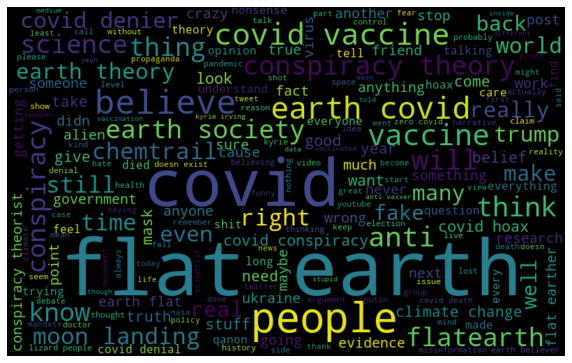

In [22]:
def keywords():
    all_words = ' '.join([text for text in FlatEarthTweets['Tweet']])
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

keywords()

${\textbf{Sentiment analysis using Textblob}}$

In [23]:
def sentiment(tweet):

    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1
    
FlatEarthTweets['Sentiment'] = FlatEarthTweets['Tweet'].apply(sentiment)

FlatEarthTweets.head(20)

,User,Date Created,Number of Likes,Tweet,Tokenized,Token_Count,Tokenized_NoStopWords,Sentiment
0,Doobyis,2022-10-07 14:42:10+00:00,1,being honest went whole life feeling place lik...,"[being, honest, went, whole, life, feeling, pl...",30,honest went whole life feeling place liking al...,1
1,jeetinhere,2022-10-07 12:25:02+00:00,0,#illuminati #newworldorder #nwo #wakeup #agend...,"[illuminati, newworldorder, nwo, wakeup, agend...",16,illuminati newworldorder nwo wakeup agenda fre...,0
2,FLATEARTHCENTER,2022-10-07 05:12:52+00:00,0,covid vaccine warning child nick coatsworth de...,"[covid, vaccine, warning, child, nick, coatswo...",15,covid vaccine warning child nick coatsworth de...,0
3,injured420,2022-10-07 03:38:34+00:00,0,sure wasn going full natural dose covid proble...,"[sure, wasn, going, full, natural, dose, covid...",24,sure going full natural dose covid problem mak...,1
4,ravenladie,2022-10-07 02:36:02+00:00,0,agree knew fallen down rabbit hole covid vacci...,"[agree, knew, fallen, down, rabbit, hole, covi...",31,agree knew fallen rabbit hole covid vaccine sp...,-1
5,Modez62,2022-10-06 19:35:45+00:00,1,tried researching flat earth back wasn stickin...,"[tried, researching, flat, earth, back, wasn, ...",17,tried researching flat earth back sticking muc...,1
6,max_rassamakin,2022-10-06 18:07:41+00:00,0,great article have idea history whatsoever ukr...,"[great, article, have, idea, history, whatsoev...",22,great article idea history whatsoever ukraine ...,1
7,SoFlatEarth,2022-10-06 14:41:53+00:00,1,covid knee,"[covid, knee]",2,covid knee,0
8,t1805Z,2022-10-06 11:25:40+00:00,0,pharmanahe covid account kann keiner mehr erns...,"[pharmanahe, covid, account, kann, keiner, meh...",31,pharmanahe covid account kann keiner mehr erns...,-1
9,SrPatriot,2022-10-05 22:49:51+00:00,1,know lady just shot covid booster,"[know, lady, just, shot, covid, booster]",6,know lady shot covid booster,0


In [24]:
FlatEarthTweets.to_csv (r'Tweets.csv', index = False, header=True)

${\textbf{Prepare data for LDA Analysis}}$

LDA stands for Latent Dirichlet Allocation, and it employs Dirichlet distributions to uncover hidden, or latent, themes in a collection of texts. It works in four steps: 
1. initializing topic assignments for each word in the documents
2. updating the topic assignment for a given word based on co-occurrence probabilities with other words and topics and Dirichlet variability
3.  repeating for all words in all documents
4.  iterating the process.

In [25]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [26]:
data = FlatEarthTweets.Tokenized_NoStopWords.values.tolist()
data_words = list(sent_to_words(data))
data_words[0]


['honest',
 'went',
 'whole',
 'life',
 'feeling',
 'place',
 'liking',
 'alberta',
 'even',
 'meet',
 'people',
 'like',
 'monster',
 'wearing',
 'battle',
 'obsessed',
 'flat',
 'earth',
 'covid',
 'denier',
 'feel',
 'like',
 'even',
 'oddity']

>${\textbf{Bag of Words}}$

In [27]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

>${\textbf{2 topics}}$

In [ ]:
# number of topics
num_topics = 2
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.046*"covid" + 0.040*"earth" + 0.039*"flat" + 0.013*"people" + '
  '0.009*"vaccine" + 0.006*"anti" + 0.006*"like" + 0.005*"denier" + '
  '0.005*"conspiracy" + 0.004*"believe"'),
 (1,
  '0.050*"covid" + 0.050*"flat" + 0.048*"earth" + 0.013*"conspiracy" + '
  '0.008*"theory" + 0.008*"like" + 0.007*"vaccine" + 0.007*"people" + '
  '0.006*"believe" + 0.004*"anti"')]


In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('ldavis_prepared_'+str(num_topics))
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1      0.012863  0.0       1        1  60.937965
0     -0.012863  0.0       2        1  39.062035, topic_info=           Term         Freq        Total Category  logprob  loglift
17       people   247.000000   247.000000  Default  30.0000  30.0000
2         covid  1292.000000  1292.000000  Default  29.0000  29.0000
3        denier    80.000000    80.000000  Default  28.0000  28.0000
46      vaccine   214.000000   214.000000  Default  27.0000  27.0000
234        anti   133.000000   133.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
23   conspiracy    47.510605   250.052017   Topic2  -5.3839  -0.7207
25    flatearth    27.039478    85.005181   Topic2  -5.9475  -0.2054
162        time    22.864296    61.723180   Topic2  -6.1153  -0.0531
82       theory    35.350469   171.597641   Topic2  -5.6795  -0.6398
299        moon    25.058699    79.298163   Topic2  -6.0236  -0.2120

[190 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
110       1  0.896041   account
110       2  0.099560   account
4270      1  0.257971  activist
4270      2  0.773914  activist
608       1  0.474713      also
...     ...       ...       ...
169       1  0.556754     would
169       2  0.445403     would
797       1  0.523175      year
797       2  0.473349      year
6052      2  0.641140    zomaar

[257 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

>${\textbf{10 topics}}$

In [ ]:
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.047*"covid" + 0.042*"earth" + 0.041*"flat" + 0.013*"conspiracy" + '
  '0.010*"theory" + 0.009*"people" + 0.007*"thing" + 0.006*"believe" + '
  '0.005*"make" + 0.005*"vaccine"'),
 (1,
  '0.040*"earth" + 0.039*"covid" + 0.035*"flat" + 0.008*"vaccine" + '
  '0.008*"know" + 0.007*"denier" + 0.006*"people" + 0.005*"anti" + '
  '0.005*"think" + 0.005*"conspiracy"'),
 (2,
  '0.062*"flat" + 0.061*"covid" + 0.060*"earth" + 0.012*"people" + '
  '0.009*"conspiracy" + 0.008*"vaccine" + 0.007*"like" + 0.007*"anti" + '
  '0.006*"believe" + 0.006*"theory"'),
 (3,
  '0.027*"covid" + 0.026*"flat" + 0.021*"earth" + 0.006*"believe" + '
  '0.005*"earthers" + 0.004*"people" + 0.004*"flatearth" + 0.004*"thing" + '
  '0.004*"real" + 0.004*"died"'),
 (4,
  '0.055*"covid" + 0.045*"earth" + 0.045*"flat" + 0.016*"conspiracy" + '
  '0.013*"vaccine" + 0.012*"like" + 0.010*"people" + 0.008*"theory" + '
  '0.006*"believe" + 0.005*"moon"'),
 (5,
  '0.031*"covid" + 0.025*"earth" + 0.025*"flat" + 0.008*"vacci

${\textbf{Analyzing LDA model results}}$

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('ldavis_prepared_'+str(num_topics))
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.055290 -0.008962       1        1  35.030889
4      0.076935  0.013197       2        1  17.180512
9      0.058679 -0.013914       3        1  12.233968
0      0.044299  0.034134       4        1   8.496410
8      0.003870  0.052662       5        1   6.447452
1     -0.012223 -0.097460       6        1   6.233998
7     -0.021908 -0.031306       7        1   4.802553
6     -0.065194  0.027239       8        1   3.665193
5     -0.049721  0.016798       9        1   3.266690
3     -0.090027  0.007612      10        1   2.642336, topic_info=            Term         Freq        Total Category  logprob  loglift
2          covid  1323.000000  1323.000000  Default  30.0000  30.0000
8           flat  1239.000000  1239.000000  Default  29.0000  29.0000
4          earth  1230.000000  1230.000000  Default  28.0000  28.0000
46       vaccine   219.000000   219.000000  Default  27.0000  27.0000
23    conspiracy   253.000000   253.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
50         death     1.433481    36.286070  Topic10  -6.1912   0.4022
608         also     1.372352    62.089700  Topic10  -6.2348  -0.1785
137         shot     1.243250    15.862657  Topic10  -6.3336   1.0873
1342      please     1.219209    19.978348  Topic10  -6.3532   0.8371
3         denier     1.219136    80.988545  Topic10  -6.3532  -0.5627

[796 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
3923      7  0.701352          abroad
4383      7  0.701345  accomplishment
110       1  0.193634         account
110       2  0.580903         account
110       3  0.096817         account
...     ...       ...             ...
357       5  0.046603         youtube
357       6  0.046603         youtube
357       7  0.046603         youtube
357       8  0.046603         youtube
2812      6  0.451830             yyc

[1711 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 10, 1, 9, 2, 8, 7, 6, 4])